<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/Data_Sprint_23_Used_Cars_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Libraries

In [112]:
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd # Data analysis and manipultion tool

## Loading Dataset

In [113]:
# In read_csv() function, we have passed the location to where the files are located in the dphi official github page.
train_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/used_car_price/train_set_label.csv" )

In [3]:
train_data.head()

,region,region_url,year,manufacturer,model_name,car_condition,#cylinders,fuel_type,odometer,title_status,transmission,vin,drive,size,car_type,car_color,image_url,car_description,county,state,latitude,longitude,price_of_car
0,san antonio,https://sanantonio.craigslist.org,2018.0,honda,accord ex-l,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00W0W_jPnECYbxWm...,"Price: $24,900 Miles: 31,269 Engine: 1.5L Turb...",NaN,tx,29.5407,-98.5521,24900
1,augusta,https://augusta.craigslist.org,2006.0,ford,f250 super duty diesel,excellent,NaN,diesel,169438.0,clean,automatic,NaN,rwd,full-size,truck,white,https://images.craigslist.org/00U0U_5ROtvUdu72...,2006 Ford F250 Lariat SuperDuty Crew Cab 4 doo...,NaN,ga,33.5161,-82.0785,0
2,hickory / lenoir,https://hickory.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,4500
3,fargo / moorhead,https://fargo.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mn,NaN,NaN,20000
4,los angeles,https://losangeles.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ca,NaN,NaN,0


In [114]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/used_car_price/test_set_label.csv')

In [115]:
test_data.head()

,region,region_url,year,manufacturer,model_name,car_condition,#cylinders,fuel_type,odometer,title_status,transmission,vin,drive,size,car_type,car_color,image_url,car_description,county,state,latitude,longitude
0,moses lake,https://moseslake.craigslist.org,2018.0,jeep,wrangler jk unlimited 4x4,NaN,NaN,gas,44721.0,clean,automatic,1C4HJWDG5JL864603,4wd,NaN,SUV,silver,https://images.craigslist.org/00101_3TjNxXI3xz...,2018 Jeep Wrangler JK Unlimited Sport 4x4 **Cl...,NaN,wa,46.2348,-119.128
1,east oregon,https://eastoregon.craigslist.org,1988.0,gmc,sierra,good,8 cylinders,gas,NaN,clean,manual,NaN,rwd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_MVIks2Lpvx...,"Great truck, 12ft flatbed,with extra side wall...",NaN,or,44.8953,-117.113
2,springfield,https://springfield.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mo,NaN,NaN
3,sacramento,https://sacramento.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ca,NaN,NaN
4,north mississippi,https://northmiss.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ms,NaN,NaN


## Basic EDA

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region           37500 non-null  object 
 1   region_url       37500 non-null  object 
 2   year             21525 non-null  float64
 3   manufacturer     20604 non-null  object 
 4   model_name       21326 non-null  object 
 5   car_condition    11140 non-null  object 
 6   #cylinders       12832 non-null  object 
 7   fuel_type        21409 non-null  object 
 8   odometer         17571 non-null  float64
 9   title_status     21468 non-null  object 
 10  transmission     21503 non-null  object 
 11  vin              12020 non-null  object 
 12  drive            14942 non-null  object 
 13  size             6548 non-null   object 
 14  car_type         16174 non-null  object 
 15  car_color        14378 non-null  object 
 16  image_url        21601 non-null  object 
 17  car_descript

## Detect Null Columns and their respective percentages

In [116]:
dict1 = (train_data.isnull().sum()[train_data.isnull().sum() > 0] / len(train_data)).to_dict()

In [117]:
dict1 

{'#cylinders': 0.6578133333333334,
 'car_color': 0.6165866666666666,
 'car_condition': 0.7029333333333333,
 'car_description': 0.4239733333333333,
 'car_type': 0.5686933333333334,
 'county': 1.0,
 'drive': 0.6015466666666667,
 'fuel_type': 0.4290933333333333,
 'image_url': 0.4239733333333333,
 'latitude': 0.43381333333333333,
 'longitude': 0.43381333333333333,
 'manufacturer': 0.45056,
 'model_name': 0.43130666666666667,
 'odometer': 0.53144,
 'size': 0.8253866666666667,
 'title_status': 0.42752,
 'transmission': 0.42658666666666667,
 'vin': 0.6794666666666667,
 'year': 0.426}

In [118]:
null_df = pd.DataFrame(dict1.items(),columns=['Features','null_percentage'])
null_df

,Features,null_percentage
0,year,0.426000
1,manufacturer,0.450560
2,model_name,0.431307
3,car_condition,0.702933
4,#cylinders,0.657813
5,fuel_type,0.429093
6,odometer,0.531440
7,title_status,0.427520
8,transmission,0.426587
9,vin,0.679467


In [125]:
drop_cols = null_df[null_df['null_percentage'] > 0.60]['Features'].values.tolist()

In [126]:
drop_cols

['car_condition', '#cylinders', 'vin', 'drive', 'size', 'car_color', 'county']

In [127]:
train_data = train_data.drop(drop_cols,axis=1)
test_data = test_data.drop(drop_cols,axis=1)

KeyError: ignored

In [128]:
cat_cols = [ col for col in train_data.columns if train_data[col].dtypes == 'O']
cat_cols

['region',
 'region_url',
 'manufacturer',
 'model_name',
 'fuel_type',
 'title_status',
 'transmission',
 'car_type',
 'image_url',
 'car_description',
 'state']

In [129]:
for col in cat_cols:
  print(f'{col} : unique values:  {train_data[col].nunique()}')

region : unique values:  238
region_url : unique values:  242
manufacturer : unique values:  41
model_name : unique values:  5398
fuel_type : unique values:  5
title_status : unique values:  6
transmission : unique values:  3
car_type : unique values:  13
image_url : unique values:  19379
car_description : unique values:  20374
state : unique values:  38


In [130]:
drop_cat_cols  = ['car_description','image_url','region_url']

In [131]:
train_data = train_data.drop(drop_cat_cols,axis=1)
test_data = test_data.drop(drop_cat_cols,axis=1)

## Missing Values imputation

In [132]:
train_data.year.dtypes

dtype('float64')

In [133]:
train_data['year'].mode()

0    2017.0
dtype: float64

In [140]:
test_data['year'].mode()[0]

2017.0

In [141]:
train_data['year'].fillna(train_data['year'].mode()[0],inplace=True)
test_data['year'].fillna(test_data['year'].mode()[0],inplace=True)

In [142]:
miss_train_cols = train_data.isnull().sum()[train_data.isnull().sum() > 0].index.tolist()

In [143]:
miss_train_cols 

['manufacturer',
 'model_name',
 'fuel_type',
 'odometer',
 'title_status',
 'transmission',
 'car_type',
 'latitude',
 'longitude']

In [144]:
for col in miss_train_cols:
  if train_data[col].dtypes == 'O':
    train_data[col].fillna('Missing',inplace=True)
  else:
    train_data[col].fillna(train_data[col].mean(), inplace=True)

In [145]:
train_data.isnull().sum()[train_data.isnull().sum() > 0]

Series([], dtype: int64)

#### Imputing null values in test_data

In [146]:
test_nulls = test_data.isnull().sum()[test_data.isnull().sum() > 0].index.tolist()

In [147]:
test_nulls

['manufacturer',
 'model_name',
 'fuel_type',
 'odometer',
 'title_status',
 'transmission',
 'car_type',
 'latitude',
 'longitude']

In [148]:
for col in test_nulls:
  if test_data[col].dtypes == 'O':
    test_data[col].fillna('Missing',inplace=True)
  else:
    test_data[col].fillna(test_data[col].mean(), inplace=True)

In [149]:
test_data.isnull().sum()[test_data.isnull().sum() > 0]

Series([], dtype: int64)

## Correlation

In [150]:
train_data.head()

,region,year,manufacturer,model_name,fuel_type,odometer,title_status,transmission,car_type,state,latitude,longitude,price_of_car
0,san antonio,2018.0,honda,accord ex-l,gas,97285.695692,clean,automatic,Missing,tx,29.540700,-98.552100,24900
1,augusta,2006.0,ford,f250 super duty diesel,diesel,169438.000000,clean,automatic,truck,ga,33.516100,-82.078500,0
2,hickory / lenoir,2017.0,Missing,Missing,Missing,97285.695692,Missing,Missing,Missing,nc,37.472843,-94.438136,4500
3,fargo / moorhead,2017.0,Missing,Missing,Missing,97285.695692,Missing,Missing,Missing,mn,37.472843,-94.438136,20000
4,los angeles,2017.0,Missing,Missing,Missing,97285.695692,Missing,Missing,Missing,ca,37.472843,-94.438136,0


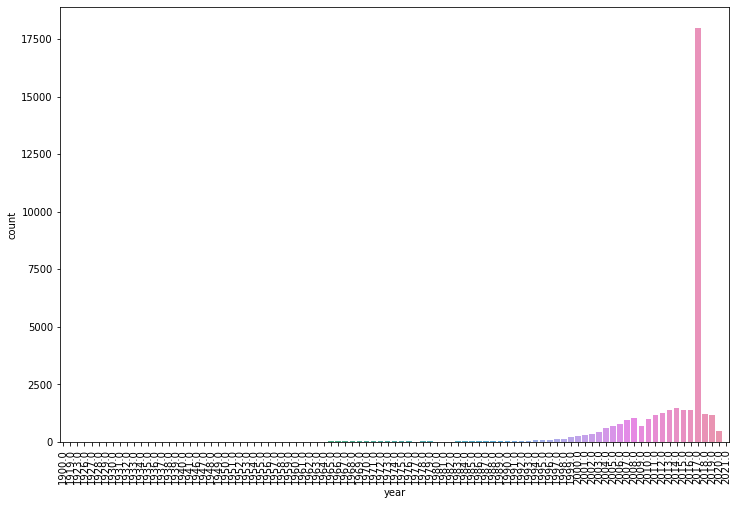

In [151]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.countplot(x='year',data=train_data)

In [152]:
train_data.isnull().sum()[train_data.isnull().sum() > 0]

Series([], dtype: int64)

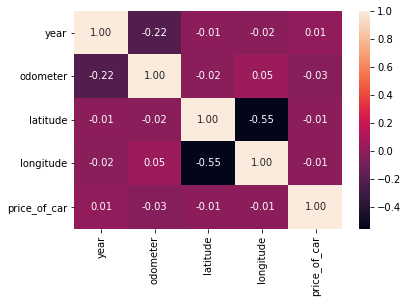

In [153]:
sns.heatmap(train_data.corr(),annot=True,fmt=".2f")

* year: entry year of the car
* car_price: entry price of the car (the target variable)
* manufacturer: manufacturer of the vehicle
* model_name: the model of the car that is listed
* fuel_type: fuel type that the listed car support
* #cylinders: number of cylinders
* odometer: miles travelled by vehicle
* title_status: title status of the vehicle
* vin: vehicle identification number
* drive: type of drive of the vehicle

In [154]:
X = train_data.drop('price_of_car',axis=1)
Y = train_data['price_of_car']

In [155]:
cat_cols = [col for col in X.columns if X[col].dtypes == 'O']
cat_cols

['region',
 'manufacturer',
 'model_name',
 'fuel_type',
 'title_status',
 'transmission',
 'car_type',
 'state']

In [156]:
!pip install catboost

     |████████████████████████████████| 65.8MB 91kB/s 


In [157]:
from catboost import CatBoostRegressor
from sklearn.metrics import *
from sklearn.model_selection import *

In [ ]:
X.shape

(37500, 14)

In [ ]:
from sklearn.model_selection import GridSearchCV
gridParams = {
    'learning_rate': [0.0007,0.005, 0.01],
    'n_estimators': [500,1000,2000],
    'random_state' : [42,500,720]
    }
catboost = CatBoostRegressor()
grid = GridSearchCV(catboost, gridParams, verbose=2, cv=5, n_jobs=-1)
# Run the grid
grid.fit(X, Y,cat_features = cat_cols)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 46.7min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 198.0min finished


0:	learn: 109895.9619171	total: 165ms	remaining: 5m 29s
1:	learn: 109895.7207048	total: 228ms	remaining: 3m 47s
2:	learn: 109895.6190018	total: 321ms	remaining: 3m 33s
3:	learn: 109895.5665738	total: 401ms	remaining: 3m 20s
4:	learn: 109895.5178386	total: 442ms	remaining: 2m 56s
5:	learn: 109895.4319034	total: 525ms	remaining: 2m 54s
6:	learn: 109895.3283783	total: 612ms	remaining: 2m 54s
7:	learn: 109895.2164045	total: 696ms	remaining: 2m 53s
8:	learn: 109895.0449260	total: 789ms	remaining: 2m 54s
9:	learn: 109892.1444673	total: 888ms	remaining: 2m 56s
10:	learn: 109891.9100966	total: 980ms	remaining: 2m 57s
11:	learn: 109891.4428696	total: 1.05s	remaining: 2m 54s
12:	learn: 109891.4300580	total: 1.12s	remaining: 2m 51s
13:	learn: 109888.7232575	total: 1.23s	remaining: 2m 54s
14:	learn: 109888.2797002	total: 1.31s	remaining: 2m 53s
15:	learn: 109888.0255105	total: 1.4s	remaining: 2m 54s
16:	learn: 109885.7538916	total: 1.5s	remaining: 2m 54s
17:	learn: 109875.9874419	total: 1.59s	rema

Streaming output truncated to the last 5000 lines.
1007:	learn: 126903.4608298	total: 31.9s	remaining: 31.4s
1008:	learn: 126892.5331190	total: 32s	remaining: 31.4s
1009:	learn: 126886.4101679	total: 32s	remaining: 31.4s
1010:	learn: 126864.4851612	total: 32s	remaining: 31.3s
1011:	learn: 126858.9770529	total: 32.1s	remaining: 31.3s
1012:	learn: 126849.3955815	total: 32.1s	remaining: 31.3s
1013:	learn: 126827.4787508	total: 32.1s	remaining: 31.2s
1014:	learn: 126811.1631146	total: 32.2s	remaining: 31.2s
1015:	learn: 126810.2979829	total: 32.2s	remaining: 31.2s
1016:	learn: 126809.4336863	total: 32.2s	remaining: 31.2s
1017:	learn: 126787.4997437	total: 32.3s	remaining: 31.1s
1018:	learn: 126783.9180862	total: 32.3s	remaining: 31.1s
1019:	learn: 126780.2422310	total: 32.3s	remaining: 31.1s
1020:	learn: 126779.3898886	total: 32.3s	remaining: 31s
1021:	learn: 126779.0204963	total: 32.4s	remaining: 31s
1022:	learn: 126765.3059027	total: 32.4s	remaining: 31s
1023:	learn: 126763.2472428	total

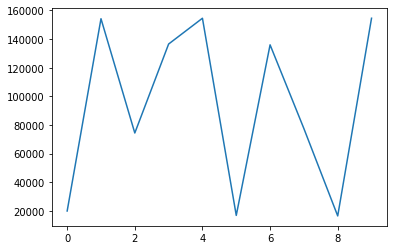

In [158]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
iterations = 5
scores = []
scores_val = []
target = Y
temp = X
predictions = []
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = KFold(n_splits = 2, shuffle=True)
    
    for train_index,test_index in kfold.split(temp,target):
        xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
        ytrain,ytest = target[train_index],target[test_index]
        
        model  = CatBoostRegressor(learning_rate =0.0007, n_estimators =2000, random_state = 42)    

        model.fit(xtrain,ytrain,cat_features = cat_cols)
            
        preds = model.predict(xtest)
        
        print(np.sqrt(mean_squared_error(ytest,preds)))
        scores.append(np.sqrt(mean_squared_error(ytest,preds)))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))

##Test Data

In [161]:
test_data.isnull().sum()[test_data.isnull().sum() > 0]/len(test_data)

Series([], dtype: float64)

In [163]:
pred = model.predict(test_data)

In [164]:
res = pd.DataFrame(pred) #target is nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("submission_catboost2.csv",index=False) # the csv file will be saved locally on the same location where this notebook is located.